In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import random

from scipy.signal import find_peaks
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

from straight_walking_speed import plot_straight_walking_speed

In [2]:
animal = 'RRM026'
session = 'Day151'

csv_folder = '/Users/yang/Documents/Wilbrecht_Lab/sleap_video'


In [3]:
dataframes = []

for filename in os.listdir(csv_folder):
    if filename.startswith(f'{animal}_{session}') and filename.endswith('_time.csv'):
        file_path = os.path.join(csv_folder, filename)
        df = pd.read_csv(file_path, index_col=0)
        dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)


In [4]:
combined_df.head()

,Head x,Head y,Neck x,Neck y,Torso x,Torso y,Tailhead x,Tailhead y,warped Head x,warped Head y,...,Torso displacement,Tailhead displacement,Head velocity,Neck velocity,Torso velocity,Tailhead velocity,Head acceleration,Neck acceleration,Torso acceleration,Tailhead acceleration
0,301.734039,107.294556,306.410126,106.350792,318.319031,102.725113,330.268768,102.522438,283.800681,132.091974,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3473.066267,1760.790663,2183.249790,3252.752994
1,298.609802,110.369171,303.178406,107.024841,314.704742,102.729561,326.431671,101.857491,281.211592,129.230469,...,2.425833,3.614170,115.768876,58.693022,72.774993,108.425100,-2536.578685,-886.081950,-513.277911,-488.626095
2,298.490509,110.641579,302.791748,107.061874,313.743103,102.406395,323.405823,98.909378,280.199481,128.988892,...,1.855524,3.071252,31.216253,29.156957,55.665729,92.137563,-600.637661,-519.457684,-498.441863,-1618.841634
3,298.527832,110.511078,302.734375,106.841103,311.542664,102.089920,323.060791,98.708641,280.552237,129.110617,...,1.301700,1.272539,11.194997,11.841701,39.051001,38.176175,1153.158114,357.056361,-595.566705,-494.331339
4,298.094635,109.558372,302.495056,106.085983,311.583282,101.766426,323.109711,98.892105,282.120893,128.584755,...,0.639959,0.723282,49.633601,23.743580,19.198777,21.698464,1364.974499,534.709018,-242.650329,760.595412


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

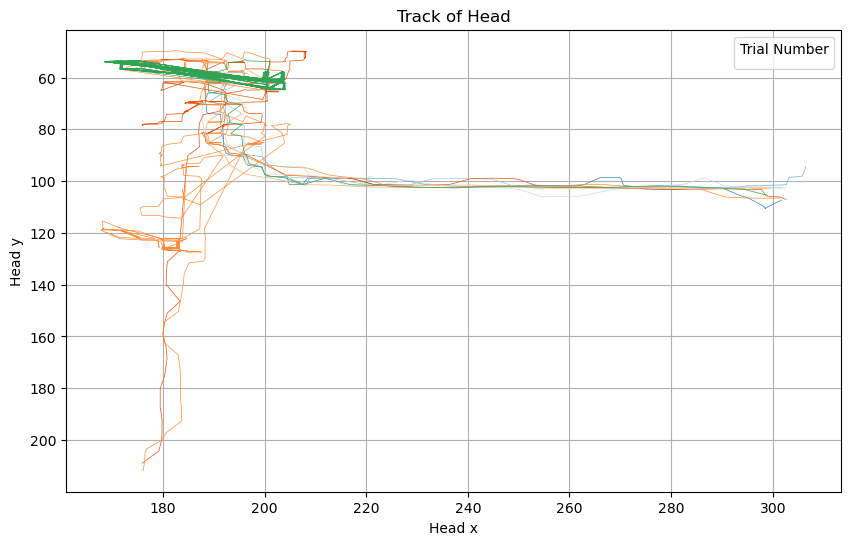

In [5]:
# Define the start and stop frames
start_frame, stop_frame = 0, 10000

# Filter the dataframe for the specified frame range
filtered_df = combined_df.iloc[start_frame:stop_frame]

plt.figure(figsize=(10, 6))

palette = sns.color_palette('tab20c', n_colors=len(filtered_df['trial num'].unique()))

for color, (trial_num, group) in zip(palette, filtered_df.groupby('trial num')):
    sns.lineplot(
        data=group,
        x='Head x',
        y='Head y',
        color=color,
        linewidth=0.5,
        legend=False,
        sort=False
    )

plt.xlabel('Head x')
plt.ylabel('Head y')
plt.title('Track of Head')
plt.legend(title='Trial Number', loc='upper right')
plt.grid(True)

# Invert y-axis to match the video coordinate system
plt.gca().invert_yaxis()

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

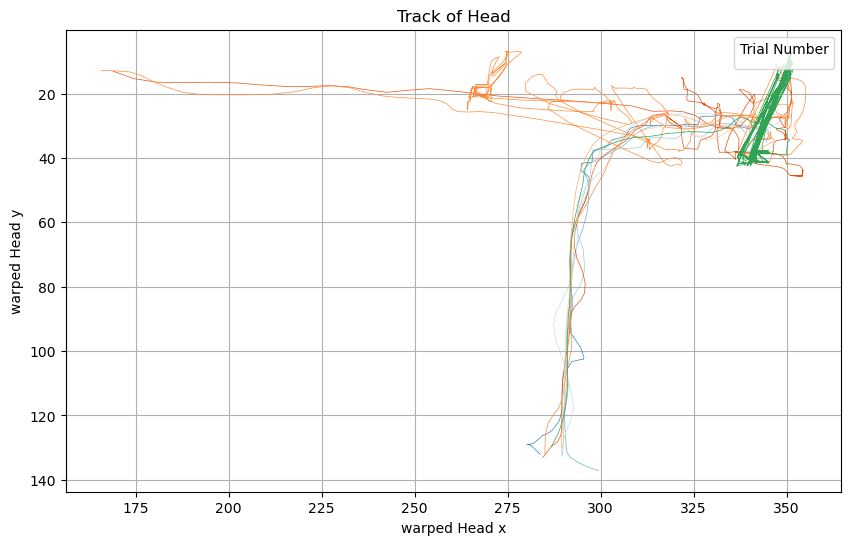

In [6]:
# Define the start and stop frames
start_frame, stop_frame = 0, 10000

# Filter the dataframe for the specified frame range
filtered_df = combined_df.iloc[start_frame:stop_frame]

plt.figure(figsize=(10, 6))

palette = sns.color_palette('tab20c', n_colors=len(filtered_df['trial num'].unique()))

for color, (trial_num, group) in zip(palette, filtered_df.groupby('trial num')):
    sns.lineplot(
        data=group,
        x='warped Head x',
        y='warped Head y',
        color=color,
        linewidth=0.5,
        legend=False,
        sort=False
    )

plt.xlabel('warped Head x')
plt.ylabel('warped Head y')
plt.title('Track of Head')
plt.legend(title='Trial Number', loc='upper right')
plt.grid(True)

# Invert y-axis to match the video coordinate system
plt.gca().invert_yaxis()

plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


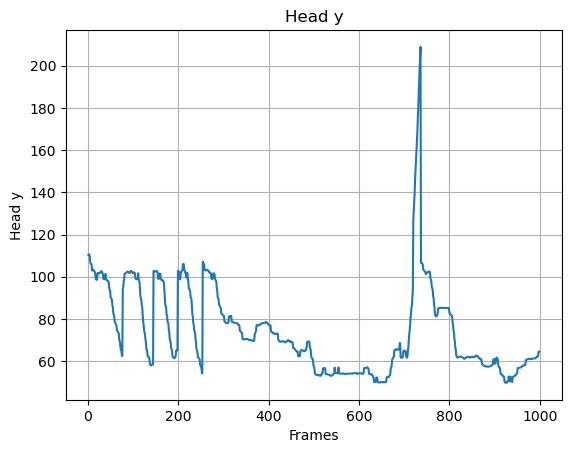

In [39]:

plot_df = combined_df[1:1000]
sns.lineplot(data=plot_df, x=plot_df.index, y='Head y')
plt.title('Head y')
plt.xlabel('Frames')
plt.ylabel('Head y')
#plt.xlim(0, )
plt.grid(True)
plt.show()


In [14]:
'''
# Extracting the data to be analyzed
data = df['Head yCoordinates']

# Detecting peaks
peaks, _ = find_peaks(data)

# Extracting peak values
peak_values = data[peaks]

# Plotting the data with peaks highlighted
plt.figure(figsize=(15, 6))
sns.lineplot(data=data)
plt.plot(peaks, peak_values, "x")  # Highlight peaks with 'x'
plt.show()
'''

'\n# Extracting the data to be analyzed\ndata = df[\'Head yCoordinates\']\n\n# Detecting peaks\npeaks, _ = find_peaks(data)\n\n# Extracting peak values\npeak_values = data[peaks]\n\n# Plotting the data with peaks highlighted\nplt.figure(figsize=(15, 6))\nsns.lineplot(data=data)\nplt.plot(peaks, peak_values, "x")  # Highlight peaks with \'x\'\nplt.show()\n'

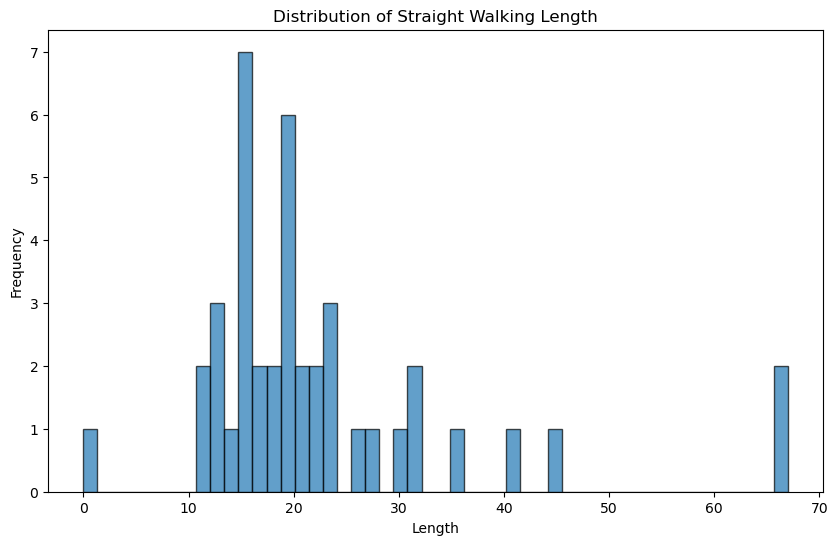

In [38]:
current_trial_num = np.nan
current_decision = np.nan
decision = np.nan
length = 0

straight_walking_length = []
trials = []
current_trial_speeds = []
current_trial_coords = []

for index, row in combined_df.iterrows():
    trial_num = row['trial num']
    decision = row['decision']
    speed = row['Head velocity']
    head_x = row['warped Head x']
    head_y = row['warped Head y']
    
    if not pd.isna(decision):
        current_decision = decision    
        
    if trial_num != current_trial_num: # End of current trial and start of a new trial
        if length < 100:
            straight_walking_length.append(length)
            length = 0
            current_decision = np.nan
            current_trial_num = trial_num
        
    if pd.isna(current_decision) and index != 0:
        if speed < 300:
            length += 1

straight_walking_length_df = pd.DataFrame(straight_walking_length)
plt.figure(figsize=(10, 6))
plt.hist(straight_walking_length_df, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Straight Walking Length')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [15]:
def get_trial_profile(df, speed_threshold=500, speed_length=12, coord_length=13):
    """
    Extracts the straight walking speed curve, trajectory, average speed, and final decision for each trial.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing the labeled data with decisions.
    speed_threshold (float): The threshold above which speeds are considered outliers and are filtered out.
    length_threshold (int): The target length for normalization of speed profiles. Profiles shorter than this are excluded.
    coord_length (int): The number of coordinate points to extract before each decision.
    
    Returns:
    pandas.DataFrame: A DataFrame with each row representing a trial, containing columns
                      for the trial number, speed profile, coordinate data, and the final decision.
    """
    current_trial_num = np.nan
    current_decision = np.nan
    decision = np.nan
    
    trials = []
    current_trial_speeds = []
    current_trial_coords = []

    for index, row in df.iterrows():
        trial_num = row['trial num']
        decision = row['decision']
        speed = row['Head velocity']
        head_x = row['warped Head x']
        head_y = row['warped Head y']
        
        if not pd.isna(decision):
            current_decision = decision    
            
        if trial_num != current_trial_num: # End of current trial and start of a new trial
            
            if len(current_trial_speeds) >= speed_length and len(current_trial_coords) >= coord_length * 2:
                # Use the last `speed_length` frames of speed values and `coord_length` frames of coordinates as the profile
                normalized_speeds = current_trial_speeds[-speed_length:]
                normalized_coords = current_trial_coords[-(coord_length * 2):]
                x1, y1 = normalized_coords[0], normalized_coords[1]
                x2, y2 = normalized_coords[-2], normalized_coords[-1]
                distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
                average_speed = distance / ((coord_length - 1) / 30)
                trials.append([normalized_speeds, normalized_coords, current_decision, average_speed])
                
            current_trial_speeds = []
            current_trial_coords = []
            current_decision = np.nan
            current_trial_num = trial_num

        if pd.isna(current_decision) and index != 0:
            if speed < speed_threshold:
                current_trial_speeds.append(speed)
                current_trial_coords.append(head_x)
                current_trial_coords.append(head_y)
        
    # Handle the final trial
    if not pd.isna(current_decision) and len(current_trial_speeds) >= speed_length and len(current_trial_coords) >= coord_length * 2:
        normalized_speeds = current_trial_speeds[-speed_length:]
        normalized_coords = current_trial_coords[-(coord_length * 2):]
        x1, y1 = normalized_coords[0], normalized_coords[1]
        x2, y2 = normalized_coords[-2], normalized_coords[-1]
        distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        average_speed = distance / ((coord_length - 1) / 30)
        trials.append([normalized_speeds, normalized_coords, current_decision, average_speed])
    
    # Convert the list of trials to a DataFrame with appropriate column names
    speed_profiles = [t[0] for t in trials]
    coord_profiles = [t[1] for t in trials]
    decisions = [t[2] for t in trials]
    average_speeds = [t[3] for t in trials]

    # Flatten coordinate profiles into individual columns
    coord_columns = [f'x {i//2+1}' if i % 2 == 0 else f'y {i//2+1}' for i in range(coord_length * 2)]
    
    profiles_df = pd.DataFrame(speed_profiles, columns=[f'speed {i+1}' for i in range(speed_length)])
    coords_df = pd.DataFrame(coord_profiles, columns=coord_columns)
    
    profiles_df['final decision'] = decisions
    profiles_df['average speed'] = average_speeds
    final_df = pd.concat([profiles_df, coords_df], axis=1)

    return final_df

In [16]:
straight_walking_speed_profiles = get_trial_profile(combined_df)
#plot_straight_walking_speed(straight_walking_speed_list[:50])


In [17]:
straight_walking_speed_profiles.head()

,speed 1,speed 2,speed 3,speed 4,speed 5,speed 6,speed 7,speed 8,speed 9,speed 10,...,x 9,y 9,x 10,y 10,x 11,y 11,x 12,y 12,x 13,y 13
0,37.994681,95.412864,105.519057,107.517366,116.036895,120.099838,111.410991,113.186222,120.153832,128.738892,...,293.042697,60.941111,294.242897,57.120042,295.961228,53.187795,296.872014,49.102400,296.969475,46.078510
1,110.225154,114.463714,117.409034,118.792228,120.857324,127.130933,138.911131,147.786861,140.311758,125.672593,...,295.262211,61.804979,296.289422,57.242117,296.793911,53.083519,296.880516,49.577242,296.547088,46.969676
2,202.130374,144.941409,215.205468,207.720450,138.196916,140.031749,133.603156,197.317014,141.128583,116.947528,...,295.290713,68.204815,293.876854,63.718022,293.352913,59.855141,294.157054,55.928096,295.927317,49.801056
3,132.847186,127.172997,113.989489,110.997887,113.161197,131.916642,133.697772,134.802501,150.428555,164.487148,...,293.545672,68.015765,293.840198,63.010137,293.722510,57.528495,294.338472,52.624025,296.164149,48.741248
4,90.995349,72.139217,83.283762,71.481481,91.232872,114.426911,126.205543,120.730813,132.406613,155.393466,...,292.928986,67.316556,293.089818,62.905934,294.135639,57.832828,295.911978,53.207304,297.048222,48.888602


In [19]:
# plot the coorelation between decision and speed
def plot_decision_composition(df, column, window_size=50, step_size=10):
    """
    Plots the composition of different decisions in different average speed intervals using a line graph with MSE.

    Parameters:
    df (pandas.DataFrame): The input DataFrame containing 'average_speed' and 'final_decision' columns.
    window_size (int): The size of the speed window.
    step_size (int): The step size for the sliding window.
    """
    # Create a copy of the DataFrame to avoid modifying the original DataFrame
    df_copy = df.copy()

    # Define speed intervals using a sliding window
    max_speed = df_copy[column].max()
    min_speed = df_copy[column].min()
    speed_intervals = np.arange(min_speed, max_speed + step_size, step_size)

    proportions = []
    
    for i in range(len(speed_intervals) - 1):
        lower_bound = speed_intervals[i]
        upper_bound = lower_bound + window_size
        interval_data = df_copy[(df_copy[column] >= lower_bound) & (df_copy[column] < upper_bound)]
        
        if len(interval_data) > 0:
            interval_composition = interval_data['final decision'].value_counts(normalize=True)
            proportions.append(interval_composition)
            
        else:
            proportions.append(pd.Series())
    # Create a DataFrame for the proportions
    proportions_df = pd.DataFrame(proportions, index=speed_intervals[:-1])

    # Plot the line graph with MSE error bars
    plt.figure(figsize=(10, 6))
    for decision in proportions_df.columns:
        plt.errorbar(proportions_df.index, proportions_df[decision], label=decision)
    
    plt.xlabel(column)
    plt.ylabel('Proportion of Decisions')
    plt.title('Composition of Decisions in Different Average Speed Intervals')
    plt.legend(title='Decision')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

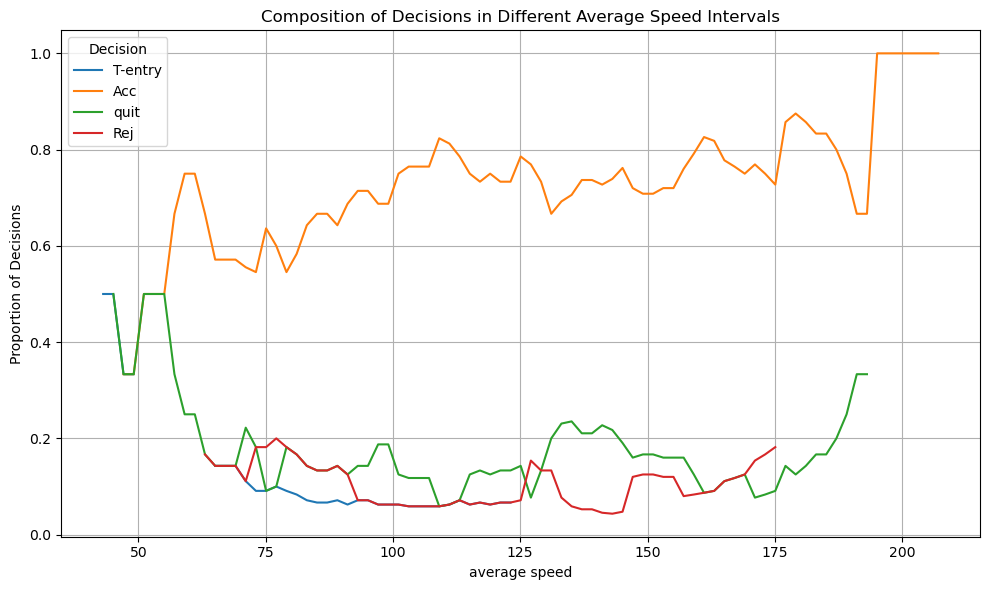

In [20]:
plot_decision_composition(straight_walking_speed_profiles, column='average speed', window_size=30, step_size=2)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


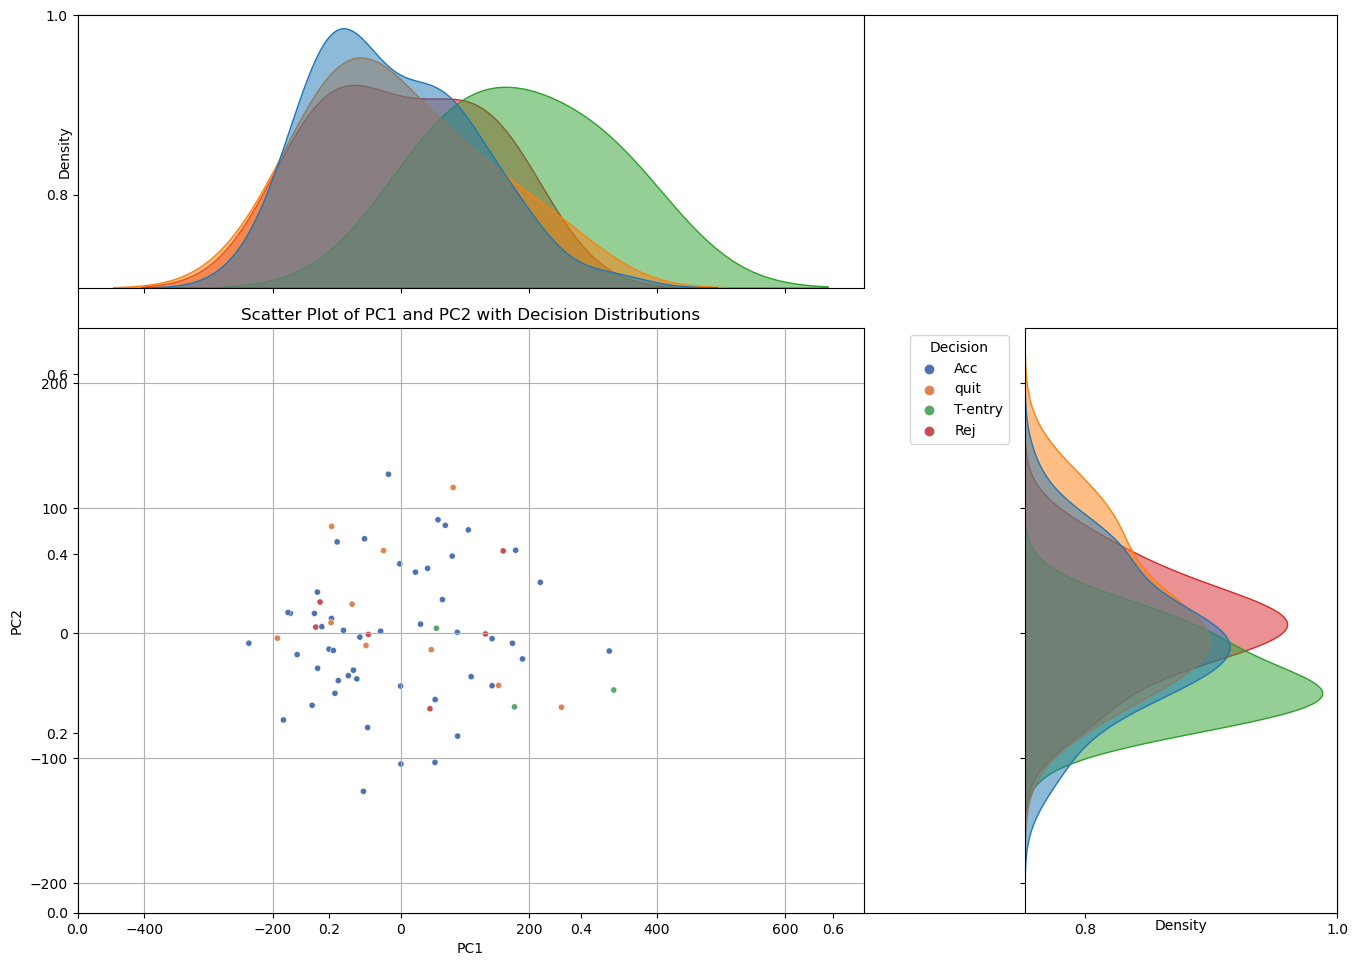

In [21]:
pca_columns=[f'speed {i+1}' for i in range(12)]

"""
Performs PCA on the coordinate columns of the DataFrame and adds the principal components to the DataFrame.

Parameters:
df (pandas.DataFrame): The input DataFrame containing the coordinate data.
coord_columns (list): List of coordinate column names to include in PCA.
n_components (int): Number of principal components to extract.

Returns:
pandas.DataFrame: The DataFrame with the principal components added.
"""
# Extract the coordinate data
coords_data = straight_walking_speed_profiles[pca_columns]

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(coords_data)

# Create a DataFrame for the principal components
pc_columns = [f'PC{i+1}' for i in range(2)]
pc_df = pd.DataFrame(principal_components, columns=pc_columns)

# Add the principal components to the original DataFrame
speed_pca = pd.concat([straight_walking_speed_profiles.reset_index(drop=True), pc_df.reset_index(drop=True)], axis=1)


"""
Plots the PCA results, including a scatter plot of PC1 and PC2 and the variance explained by each PC.

Parameters:
df_with_pcs (pandas.DataFrame): The DataFrame with the principal components.
pca (PCA): The fitted PCA object.
decision_column (str): The column name for decisions to color the scatter plot.
"""
# New Code: Create the figure and axis objects
fig, ax = plt.subplots(figsize=(14, 10))

# New Code: Create gridspec for layout
from matplotlib.gridspec import GridSpec
gs = GridSpec(3, 3, figure=fig)
main_ax = fig.add_subplot(gs[1:, :-1])
x_hist = fig.add_subplot(gs[0, :-1], sharex=main_ax)
y_hist = fig.add_subplot(gs[1:, -1], sharey=main_ax)

# New Code: Scatter plot of PC1 and PC2
sns.scatterplot(data=speed_pca, x='PC1', y='PC2', hue='final decision', palette='deep', s=20, ax=main_ax)
main_ax.set_xlabel('PC1')
main_ax.set_ylabel('PC2')
main_ax.set_title('Scatter Plot of PC1 and PC2 with Decision Distributions')
main_ax.legend(title='Decision', bbox_to_anchor=(1.05, 1), loc='upper left')
main_ax.grid(True)

# New Code: KDE plot for the distribution of different decisions' points along PC1
sns.kdeplot(data=speed_pca, x='PC1', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=x_hist)
x_hist.set_ylabel('Density')
x_hist.set_xlabel('')
x_hist.set_yticks([])

# New Code: KDE plot for the distribution of different decisions' points along PC2
sns.kdeplot(data=speed_pca, y='PC2', hue='final decision', fill=True, alpha=0.5, common_norm=False, legend=False, ax=y_hist)
y_hist.set_xlabel('Density')
y_hist.set_ylabel('')
y_hist.set_xticks([])

# Adjust layout
plt.setp(x_hist.get_xticklabels(), visible=False)
plt.setp(y_hist.get_yticklabels(), visible=False)
plt.tight_layout()
plt.show()

PC1 = -0.150 * speed 1 + -0.188 * speed 2 + -0.195 * speed 3 + -0.235 * speed 4 + -0.261 * speed 5 + -0.313 * speed 6 + -0.329 * speed 7 + -0.357 * speed 8 + -0.360 * speed 9 + -0.364 * speed 10 + -0.333 * speed 11 + -0.272 * speed 12


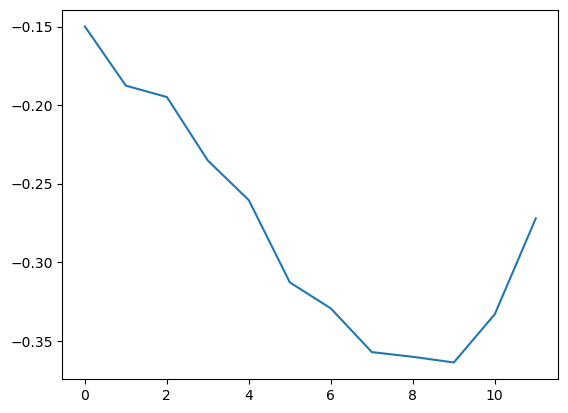

In [22]:
# Output the expression of PC1
pc1_expression = " + ".join([f"{coef:.3f} * {col}" for coef, col in zip(pca.components_[0], pca_columns)])
print(f"PC1 = {pc1_expression}")
plt.plot(pca.components_[0])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


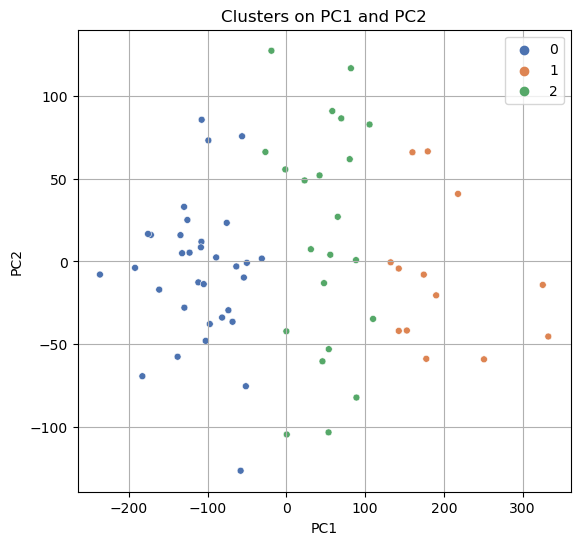

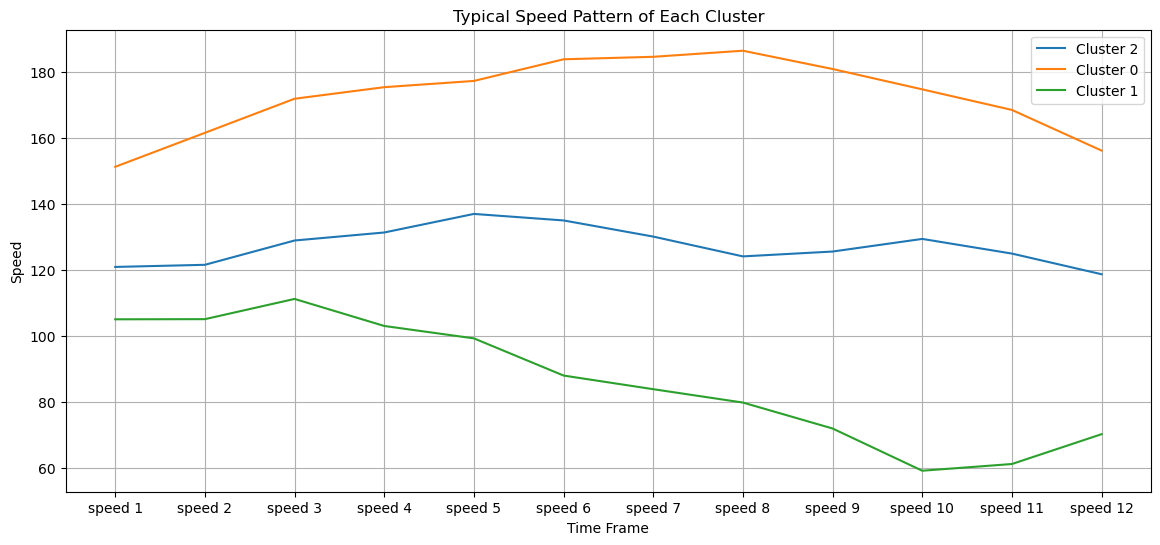

In [23]:

"""
Clusters the PCA-transformed data using K-means and adds cluster labels to the DataFrame.

Parameters:
df_with_pcs (pandas.DataFrame): The DataFrame with principal components.
n_clusters (int): The number of clusters to form.

Returns:
pandas.DataFrame: The DataFrame with cluster labels added.
"""
# Extract the PCA columns
pca_columns = ['PC1', 'PC2']
pca_data = speed_pca[pca_columns]

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(pca_data)

# Add cluster labels to the DataFrame
speed_pca['Cluster'] = kmeans.labels_


"""
Plots the PCA results with clusters and decision labels.

Parameters:
df_with_pcs (pandas.DataFrame): The DataFrame with principal components and cluster labels.
decision_column (str): The column name for decisions to color the scatter plot.
"""
# Scatter plot of PC1 and PC2 with clusters
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
clusters = speed_pca['Cluster'].unique()
sns.scatterplot(data=speed_pca, x='PC1', y='PC2', hue='Cluster', palette='deep', s=25)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters on PC1 and PC2')
plt.legend()
plt.grid(True)
plt.show()

# Plot the typical speed pattern of each cluster
"""
Plots the typical speed pattern for each cluster.

Parameters:
speed_pca (pandas.DataFrame): The DataFrame with speed profiles and cluster labels.
"""
plt.figure(figsize=(14, 6))

for cluster in clusters:
    cluster_data = speed_pca[speed_pca['Cluster'] == cluster]
    mean_speed_pattern = cluster_data[[f'speed {i+1}' for i in range(12)]].mean()
    plt.plot(mean_speed_pattern, label=f'Cluster {cluster}')

plt.xlabel('Time Frame')
plt.ylabel('Speed')
plt.title('Typical Speed Pattern of Each Cluster')
plt.legend()
plt.grid(True)
plt.show()


In [24]:
# Function to calculate the slope and intercept for each trial using sklearn
def calculate_slope_intercept(df):
    slopes = []
    intercepts = []

    for index, row in df.iterrows():
        x_coords = row[[f'x {i+1}' for i in range(13)]].values.reshape(-1, 1)
        y_coords = row[[f'y {i+1}' for i in range(13)]].values.reshape(-1, 1)
        
        # Perform linear regression using sklearn
        reg = LinearRegression().fit(y_coords, x_coords)
        slope = reg.coef_[0][0]
        intercept = reg.intercept_[0]
        
        slopes.append(slope)
        intercepts.append(intercept)
    
    df['slope'] = slopes
    df['intercept'] = intercepts

    return df

# Apply the function to the DataFrame
straight_walking_speed_profiles = calculate_slope_intercept(straight_walking_speed_profiles)

In [25]:
straight_walking_speed_profiles.describe()

,speed 1,speed 2,speed 3,speed 4,speed 5,speed 6,speed 7,speed 8,speed 9,speed 10,...,x 10,y 10,x 11,y 11,x 12,y 12,x 13,y 13,slope,intercept
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,...,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000
mean,132.710835,137.922444,146.491721,147.411569,149.431846,149.823025,147.813761,145.993175,142.278463,138.076413,...,292.764335,60.694974,293.530951,56.233541,294.411846,51.921561,295.364779,47.834561,-0.104527,299.332116
std,37.632105,36.012953,34.471734,38.012732,38.830751,43.883433,45.267408,49.250702,49.685623,51.480124,...,2.567282,5.485081,2.340103,3.911206,2.208181,2.472686,2.086675,1.402086,0.078596,4.176326
min,37.994681,62.778639,76.813985,46.480120,33.157708,20.441936,2.445397,5.561730,5.678514,8.929517,...,287.091850,48.726448,288.631121,48.374244,289.475175,47.454265,289.584565,46.007345,-0.492002,291.818669
25%,105.740083,111.988614,120.194769,121.988614,119.009317,124.247570,121.171994,111.517704,100.192653,95.109061,...,291.285975,56.439753,292.394163,53.079762,293.041920,49.911972,294.109721,46.488443,-0.139950,296.960606
50%,139.571637,145.194874,152.986519,156.070956,154.767691,152.770346,151.077033,148.102403,151.555835,153.142694,...,293.081845,62.389780,293.498574,56.906737,294.360214,51.889803,295.524688,47.765215,-0.097512,299.357430
75%,154.342458,165.735532,170.600563,174.289906,176.066694,187.049062,182.964200,188.988463,184.079518,176.212124,...,294.171604,64.567637,295.132775,58.884461,296.246842,53.856043,296.895686,48.964162,-0.056860,301.221375
max,202.146539,205.895848,215.205468,207.720450,218.310139,222.653596,223.795887,225.295955,238.557431,234.723576,...,298.045355,72.387326,298.411692,64.601728,298.735072,57.301902,299.488384,50.894499,0.037985,317.058977


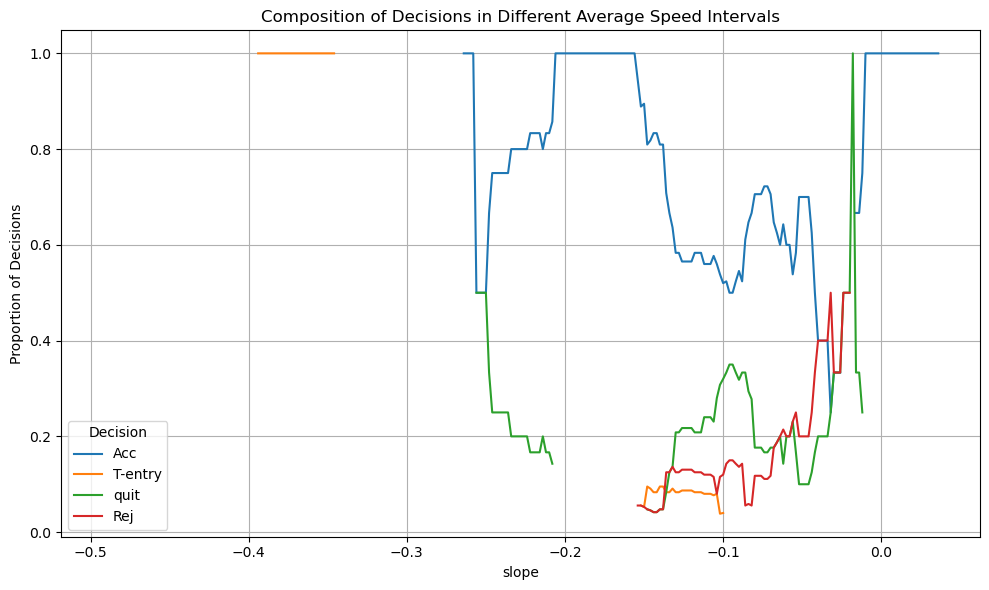

In [26]:
plot_decision_composition(straight_walking_speed_profiles, column='slope', window_size=0.05, step_size=0.002)

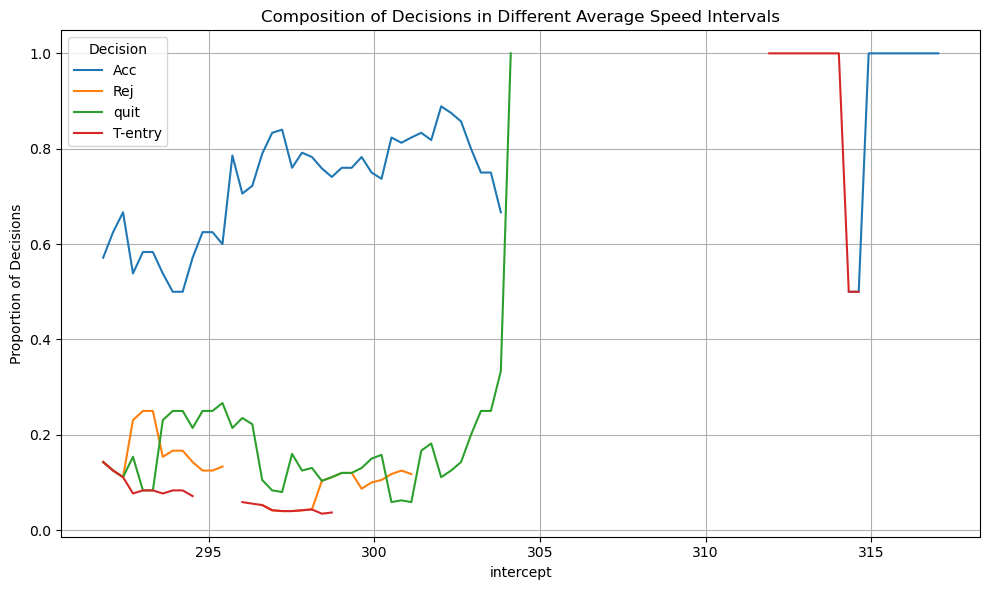

In [27]:
plot_decision_composition(straight_walking_speed_profiles, column='intercept', window_size=3, step_size=0.3)